<a href="https://colab.research.google.com/github/mohammedfaizan3103/ML-pracitice/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 2
## Improving classification algorithm on education dataset using hyperparameter tuning
### Sixth Information Systems International Conference (ISICO 2021)  

In this paper, researchers propose a classification method for any institution's campus placement possibility using Placement Data Full Class for campus recruitment dataset. Researchers attempt to study the supervised learning classification algorithms such as Logistic Regression, Support Vector Classifier (SVC), K-Nearest Neighbors (KNN), Gaussian Naive Bayes, Decision Tree, Random Forest, Gradient Boosting, and Linear Discriminant Analysis (LDA). Hyperparameter optimization also used to optimize the supervised algorithms for better results. Experimental results have found that by using hyperparameter tuning in Linear Discriminant Analysis (LDA), it can increase the accuracy performance results, and also given a better result compared to other algorithms.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')


Import dataset

In [22]:
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Assignment 2/Placement_Data_Full_Class.csv")

In [23]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Preprocessing

In [24]:
df.drop(['sl_no', 'salary'], axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'degree_t', 'workex', 'specialisation', 'status', 'hsc_s']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [25]:
df.dtypes

,0
gender,int64
ssc_p,float64
ssc_b,int64
hsc_p,float64
hsc_b,int64
hsc_s,int64
degree_p,float64
degree_t,int64
workex,int64
etest_p,float64


In [27]:
df.isnull().sum().sum()

np.int64(0)

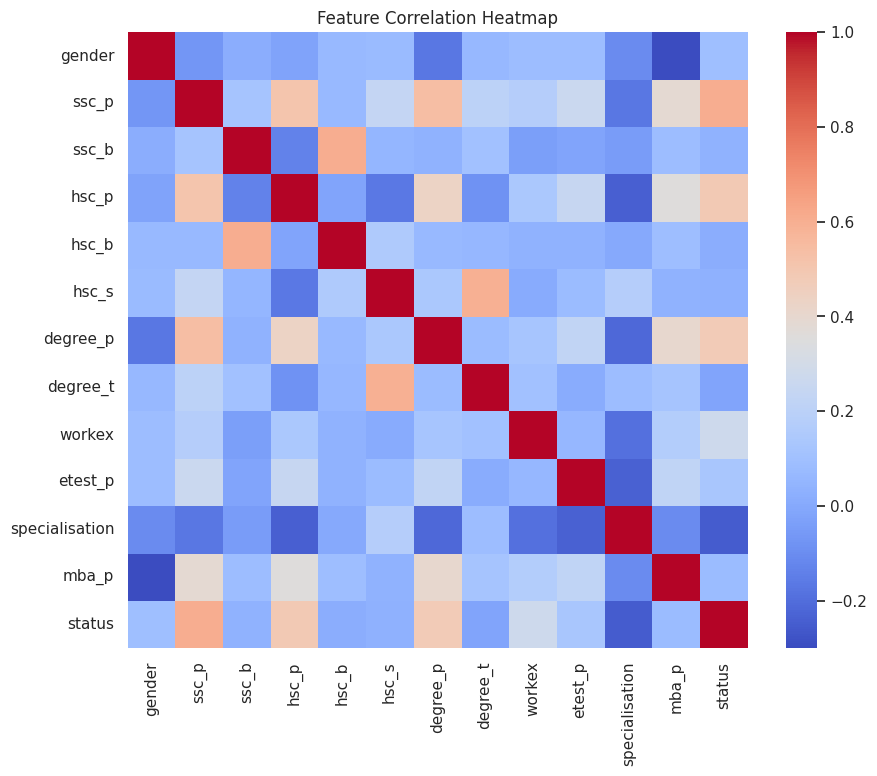

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [28]:
X = df.drop('status', axis=1)
y = df['status']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Baseline Models

In [29]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LDA': LinearDiscriminantAnalysis()
}

baseline_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
    baseline_results[name] = {'Accuracy': accuracy, 'F1-Score': f1, 'ROC-AUC': roc}

In [30]:
baseline_df = pd.DataFrame(baseline_results).T
print("Baseline Model Results:")
print(baseline_df)

Baseline Model Results:
                     Accuracy  F1-Score   ROC-AUC
Logistic Regression  0.837209  0.877193  0.930769
SVM                  0.883721  0.915254  0.905128
KNN                  0.790698  0.857143  0.808974
Decision Tree        0.744186  0.830769  0.642308
Random Forest        0.837209  0.888889  0.912821
Gradient Boosting    0.813953  0.870968  0.920513
LDA                  0.860465  0.896552  0.923077


### Hyperparameter Tuning

Decision Tree

In [31]:
dt_param_grid = {
    'max_depth': [2, 4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5)
dt_grid.fit(X_train_scaled, y_train)
best_dt = dt_grid.best_estimator_
print(f"Best Decision Tree Params: {dt_grid.best_params_}")

Best Decision Tree Params: {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10}


Random Forest

In [32]:
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5)
rf_grid.fit(X_train_scaled, y_train)
best_rf = rf_grid.best_estimator_
print(f"Best Random Forest Params: {rf_grid.best_params_}")

Best Random Forest Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}


Gradient Boosting

In [33]:
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=5)
gb_grid.fit(X_train_scaled, y_train)
best_gb = gb_grid.best_estimator_
print(f"Best Gradient Boosting Params: {gb_grid.best_params_}")

Best Gradient Boosting Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


SVM

In [34]:
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svc_grid = GridSearchCV(SVC(probability=True, random_state=42), svc_param_grid, cv=5)
svc_grid.fit(X_train_scaled, y_train)
best_svc = svc_grid.best_estimator_
print(f"Best SVM Params: {svc_grid.best_params_}")


Best SVM Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


LDA

In [36]:
lda_param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.0, 0.1, 0.3, 0.5, 0.8, 1.0]
}

lda_grid = GridSearchCV(
    LinearDiscriminantAnalysis(),
    lda_param_grid,
    cv=5,
    scoring='accuracy'
)

lda_grid.fit(X_train_scaled, y_train)
best_lda = lda_grid.best_estimator_
print(f"Best LDA Params: {lda_grid.best_params_}")


Best LDA Params: {'shrinkage': 'auto', 'solver': 'lsqr'}


Evaluate all Tuned Models

In [37]:
tuned_models = {
    'Decision Tree': best_dt,
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb,
    'SVM': best_svc,
    'LDA': best_lda
}

tuned_results = {}
for name, model in tuned_models.items():
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    tuned_results[name] = {
        'Accuracy': accuracy,
        'F1-Score': f1,
        'ROC-AUC': roc
    }

# Convert to DataFrame for easy viewing
tuned_df = pd.DataFrame(tuned_results).T
tuned_df = tuned_df.sort_values(by='Accuracy', ascending=False)

print("Tuned Model Results (Including LDA):")
print(tuned_df)

Tuned Model Results (Including LDA):
                   Accuracy  F1-Score   ROC-AUC
LDA                0.883721  0.915254  0.946154
SVM                0.860465  0.896552  0.938462
Random Forest      0.860465  0.903226  0.929487
Gradient Boosting  0.837209  0.888889  0.882051
Decision Tree      0.744186  0.830769  0.666667


### Visualizations

Bar plot for Accuracy comparison

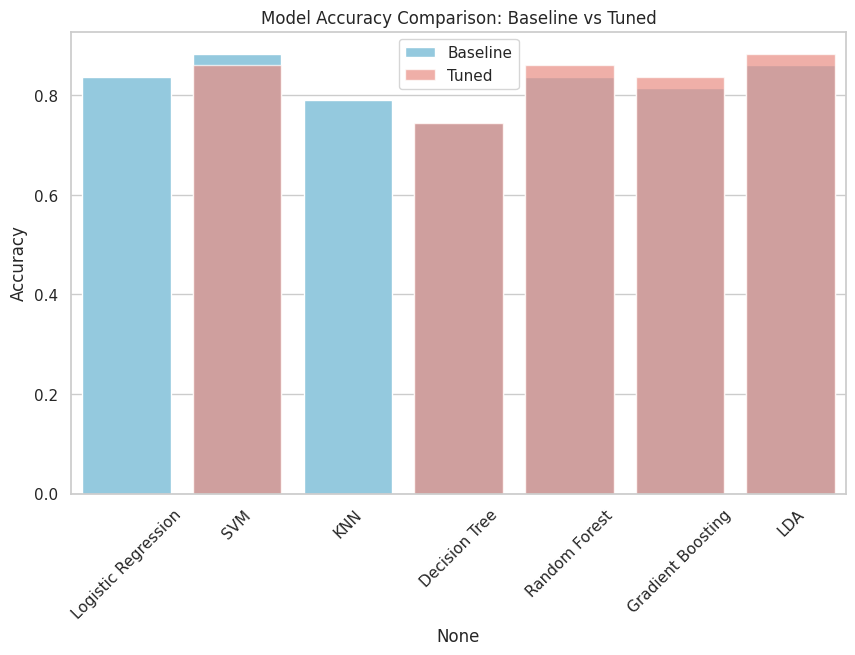

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x=baseline_df.index, y=baseline_df['Accuracy'], color='skyblue', label='Baseline')
sns.barplot(x=tuned_df.index, y=tuned_df['Accuracy'], color='salmon', alpha=0.7, label='Tuned')
plt.title("Model Accuracy Comparison: Baseline vs Tuned")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend()
plt.show()

ROC Curves for best tuned models

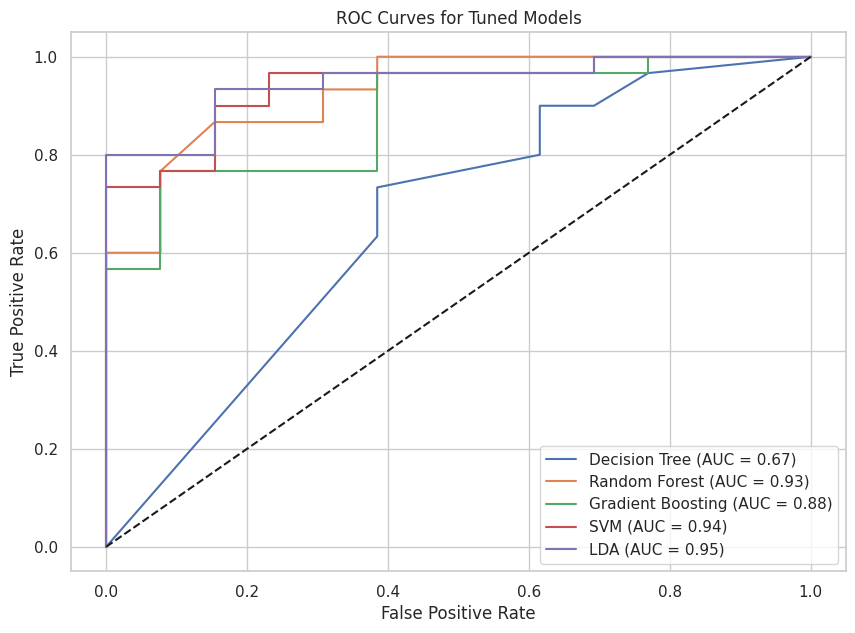

In [40]:
plt.figure(figsize=(10,7))
for name, model in tuned_models.items():
    y_proba = model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves for Tuned Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


Confusion Matrix for all models

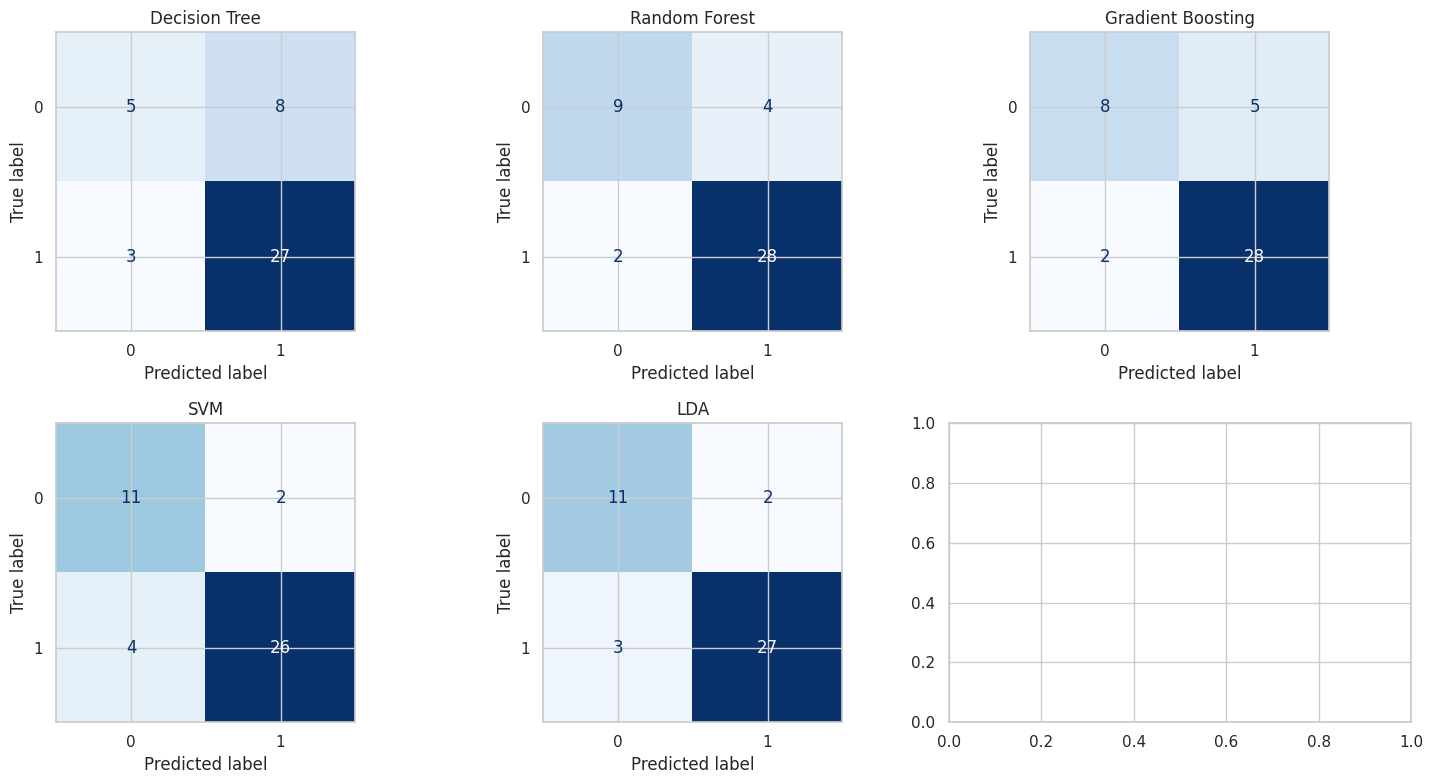

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(2, 3, figsize=(15,8))
axes = axes.flatten()

for ax, (name, model) in zip(axes, tuned_models.items()):
    y_pred = model.predict(X_test_scaled)
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(name)

plt.tight_layout()
plt.show()


LDA Baseline vs Tuned

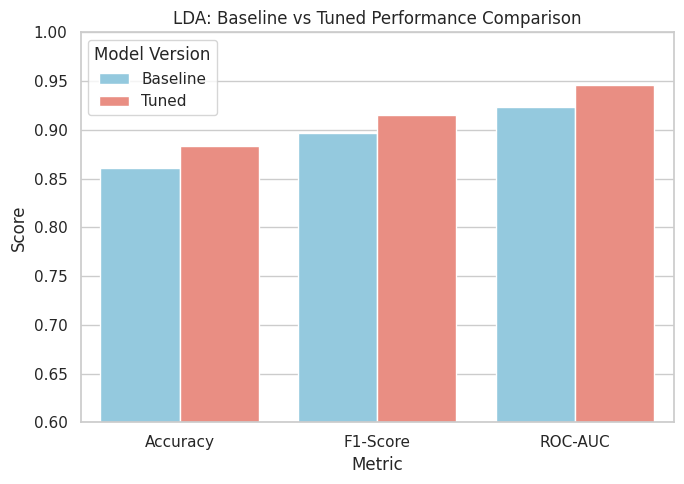

In [44]:
lda_baseline_acc = baseline_df.loc['LDA', 'Accuracy']
lda_tuned_acc = tuned_df.loc['LDA', 'Accuracy']

lda_baseline_f1 = baseline_df.loc['LDA', 'F1-Score']
lda_tuned_f1 = tuned_df.loc['LDA', 'F1-Score']

lda_baseline_roc = baseline_df.loc['LDA', 'ROC-AUC']
lda_tuned_roc = tuned_df.loc['LDA', 'ROC-AUC']

lda_compare = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'ROC-AUC'],
    'Baseline': [lda_baseline_acc, lda_baseline_f1, lda_baseline_roc],
    'Tuned': [lda_tuned_acc, lda_tuned_f1, lda_tuned_roc]
})

lda_melted = lda_compare.melt(id_vars='Metric', var_name='Type', value_name='Score')

plt.figure(figsize=(7,5))
sns.barplot(x='Metric', y='Score', hue='Type', data=lda_melted, palette=['skyblue','salmon'])
plt.title("LDA: Baseline vs Tuned Performance Comparison")
plt.ylim(0.6, 1.0)
plt.legend(title='Model Version')
plt.tight_layout()
plt.show()
